## Data Exploration Analysis
In this section the data exploration and determining of insights are conducted

In [2]:
# importing library
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
#import mplfinance as mpf
import seaborn as sns
from IPython.display import Image
from IPython.display import Markdown, display, Image, display_html
from scipy.stats import skew

In [3]:
# path
import os
import sys
import warnings

In [3]:
sns.set()
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)
pd.set_option("expand_frame_repr", False)
pd.set_option('display.float_format', '{:.2f}'.format)

In [4]:
sys.path.append(os.path.abspath(os.path.join('../scripts')))

In [5]:
# custom modules
from data_info import DataInfo
from visualization import VisualiseDf
import helper as hlp

## Data Sources 
There are two datasets available for this project.
- The first one is the table that contains information about the trip data
>- Trip ID          
>- Trip Origin       
>- Trip Destination  
>- Trip Start Time   
>- Trip End Time    

- The second one is the table that contains delivery requests by clients order data(completed and unfulfilled) 
 >- id               
 >- order_id       
 >- driver_id        
 >- driver_action 
 >- lat            
 >- lng            
 >- created_at    
 >- updated_at  

In [166]:
#  reading the trip dataset
df_trip = pd.read_csv('../data/nb.csv')

In [8]:
df_trip.head()

,Trip ID,Trip Origin,Trip Destination,Trip Start Time,Trip End Time
0,391996,"6.508813001668548,3.37740316890347","6.650969799999999,3.3450307",2021-07-01 07:28:04,2021-07-01 07:29:37
1,391997,"6.4316714,3.4555375","6.4280814653326,3.4721885847586",2021-07-01 06:38:04,2021-07-01 07:07:28
2,391998,"6.631679399999999,3.3388976","6.508324099999999,3.3590397",2021-07-01 06:21:02,2021-07-01 07:02:23
3,391999,"6.572757200000001,3.3677082","6.584881099999999,3.3614073",2021-07-01 07:16:07,2021-07-01 07:29:42
4,392001,"6.6010417,3.2766339","6.4501069,3.3916154",2021-07-01 09:30:59,2021-07-01 09:34:36


In [9]:
# init
df_info = DataInfo(df_trip)

In [10]:
# shape of the data source
df_info.shape_df()

Dataframe contains 536020 rows and 5 columns


In [11]:
# percentage of null in the dataset
df_info.null_percentage()

Dataframe contains null values of 0.06% out of the given dataset


In [12]:
# checking null
df_info.get_count_null()

Trip ID                0
Trip Origin            0
Trip Destination       0
Trip Start Time     1651
Trip End Time          1
dtype: int64


In [13]:
 #information
df_info.detail_info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 536020 entries, 0 to 536019
Data columns (total 5 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Trip ID           536020 non-null  int64 
 1   Trip Origin       536020 non-null  object
 2   Trip Destination  536020 non-null  object
 3   Trip Start Time   534369 non-null  object
 4   Trip End Time     536019 non-null  object
dtypes: int64(1), object(4)
memory usage: 20.4+ MB
None


In [14]:
# order dataset
df_order = pd.read_csv('../data/driver_locations_during_request.csv')

In [15]:
df_order.head()

,id,order_id,driver_id,driver_action,lat,lng,created_at,updated_at
0,1,392001,243828,accepted,6.60,3.27,NaN,NaN
1,2,392001,243588,rejected,6.59,3.29,NaN,NaN
2,3,392001,243830,rejected,6.60,3.28,NaN,NaN
3,4,392001,243539,rejected,6.60,3.28,NaN,NaN
4,5,392001,171653,rejected,6.61,3.29,NaN,NaN


In [16]:
order_info = DataInfo(df_order)

In [17]:
# info
order_info.detail_info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1557740 entries, 0 to 1557739
Data columns (total 8 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   id             1557740 non-null  int64  
 1   order_id       1557740 non-null  int64  
 2   driver_id      1557740 non-null  int64  
 3   driver_action  1557740 non-null  object 
 4   lat            1557740 non-null  float64
 5   lng            1557740 non-null  float64
 6   created_at     0 non-null        float64
 7   updated_at     0 non-null        float64
dtypes: float64(4), int64(3), object(1)
memory usage: 95.1+ MB
None


In [18]:
# null info
order_info.get_count_null()

id                     0
order_id               0
driver_id              0
driver_action          0
lat                    0
lng                    0
created_at       1557740
updated_at       1557740
dtype: int64


In [19]:
# percentage of null in the dataset
order_info.null_percentage()

Dataframe contains null values of 25.0% out of the given dataset


In [20]:
# shape of the data set
order_info.shape_df()

Dataframe contains 1557740 rows and 8 columns


## Data cleaning 
- some null values in the trip data frame (start_time and end time) need to be handled 
- the created_at and updated_at columns from order dataframe need an attention
- datatype of the start and end time shall be Datetime

In [21]:
# droping the null records 
df_trip.dropna(inplace = True)

In [22]:
# checking
df_trip.isna().sum()

Trip ID             0
Trip Origin         0
Trip Destination    0
Trip Start Time     0
Trip End Time       0
dtype: int64

In [23]:
# dropping the null columns from the order dataframe
df_order.drop(['created_at', 'updated_at'], inplace=True, axis=1)

In [24]:
# checking
df_order.isna().sum()

id               0
order_id         0
driver_id        0
driver_action    0
lat              0
lng              0
dtype: int64

In [25]:
# changing start and end time  to datatime 
df_trip['Trip Start Time']= pd.to_datetime(df_trip['Trip Start Time'])
df_trip['Trip End Time']= pd.to_datetime(df_trip['Trip End Time'])

In [26]:
# checking
df_trip.dtypes

Trip ID                      int64
Trip Origin                 object
Trip Destination            object
Trip Start Time     datetime64[ns]
Trip End Time       datetime64[ns]
dtype: object

## Feature engineertring
The following feature are added
- Distance from the `Trip Oring and Trip Destination'
- Speed in second from the `start time and end time` of the trip table would derived.

**Distance computatution from the two coordinates**

In [31]:
# first separate latitide and longitide from the from each coordinate point
df_trip['Trip_Origin_lat'] = df_trip['Trip Origin'].apply(lambda x: str(x).split(',')[0])
df_trip['Trip_Origin_lng'] = df_trip['Trip Origin'].apply(lambda x: str(x).split(',')[1])

In [32]:
# trip destination
df_trip['Trip_Destn_lat'] = df_trip['Trip Destination'].apply(lambda x: str(x).split(',')[0])
df_trip['Trip_Destn_lng'] = df_trip['Trip Destination'].apply(lambda x: str(x).split(',')[1])

In [46]:
# calculating distance in km
import geopy
def distance(row):
    return geopy.distance.distance((row.Trip_Origin_lat, row.Trip_Origin_lng),(row.Trip_Destn_lat, row.Trip_Destn_lng)).km
df_trip['Distance']= df_trip.apply(lambda r: distance(r), axis=1)

In [48]:
df_trip.drop(['Speed'], inplace = True, axis=1)

**Speed(duration over the distance)in seconds**

In [49]:
# adding speed or duration 
df_trip['Speed']= (df_trip['Trip End Time']-df_trip['Trip Start Time']).astype('timedelta64[s]')

In [51]:
# checking 
df_trip.head(1)

,Trip ID,Trip Origin,Trip Destination,Trip Start Time,Trip End Time,Trip_Origin_lat,Trip_Origin_lng,Trip_Destn_lat,Trip_Destn_lng,Distance,Speed
0,391996,"6.508813001668548,3.37740316890347","6.650969799999999,3.3450307",2021-07-01 07:28:04,2021-07-01 07:29:37,6.508813001668548,3.37740316890347,6.650969799999999,3.3450307,16.12,93.00


## Merging the datasets

In [52]:
# mering
df_tripOrder = df_trip.merge(df_order, how='inner', left_on ='Trip ID', right_on ='order_id')

In [55]:
# copy
df_tripOrders = df_tripOrder.copy()

In [12]:
## reading from the saved file 
df_tripOrders = pd.read_csv('../data/triporderData.csv')

In [13]:
#df_tripOrders.info()

## Adding some additional features 

In [15]:
# adding month
df_tripOrders['Month'] = df_tripOrders['Trip Start Time'].dt.month_name()
# adding start day
df_tripOrders['Day'] = df_tripOrders['Trip Start Time'].dt.day_name()
# adding hour
df_tripOrders['Hour'] = df_tripOrders['Trip Start Time'].dt.hour
# adding date
df_tripOrders['Date'] = df_tripOrders['Trip Start Time'].dt.date

In [57]:
df_tripOrders["Weekday"] =  df_tripOrders["Trip Start Time"].dt.dayofweek

In [69]:
## adding trip end date 
df_tripOrders['EDate'] = df_tripOrders['Trip End Time'].dt.date

In [17]:
# checking month
df_tripOrders.Month.value_counts()

July         1555355
August           217
February          76
September         66
January            4
Name: Month, dtype: int64

In [18]:
# days distribution
df_tripOrders.Day.value_counts()

Tuesday      360267
Friday       320412
Thursday     275498
Wednesday    238931
Monday       160734
Saturday     142542
Sunday        57334
Name: Day, dtype: int64

### adding Holydays

In [6]:
df_trips =pd.read_csv('../data/triporderData.csv')

In [175]:
from datetime import date
import holidays
ng_holidays = holidays.NG() 
df_tripOrders['Holiday'] = df_tripOrders['Date'].isin(ng_holidays)

In [180]:
df_tripOrders['Holiday'].value_counts()

False    1555718
Name: Holiday, dtype: int64

### Weekend analysis

In [13]:
df_tripOrders['is_weekend'] = df_tripOrders['Trip Start Time'].apply(lambda x: hlp.isWeekend(x))

Note that: it shows no holydays 

### adding whether
- rainy vs non-rainy

### adding special occasions, traffic condition
- 

## Univariate Exploration

**Order Request analysis**

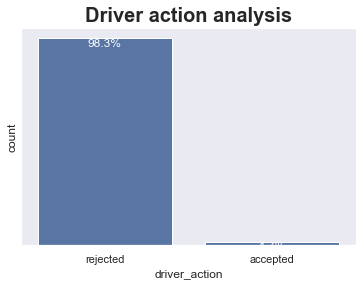

In [56]:
plt.title(f'Driver action analysis', size=20, fontweight='bold')
VisualiseDf.plot_discriptive_count(df_tripOrders,df_tripOrders['driver_action'] )

- As we can see from the above, most of the requests (98.3%) are rejected by the drivers

**Daily accepted request analyis**

In [73]:
# filtering only accepted orders
df_trorderAccept = df_tripOrders.query('driver_action =="accepted"')

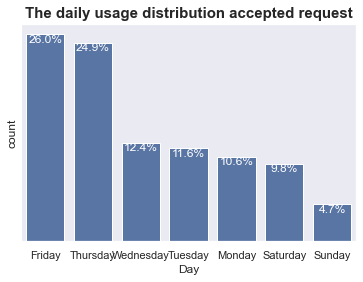

In [75]:
# daily distribution analysis
plt.title("The daily distribution of accepted request", size=15, fontweight='bold')
VisualiseDf.plot_discriptive_count(df_trorderAccept, df_trorderAccept['Day'])

**observatuons**
>- Friday is showing the day in which most of the order requests are accepted.
>- Thursday is the second most requests are accepted.
>- Sunday shows the least orders are accepted. May be this could be due to small number of requests broadcasted on that day.
>- Weekdays are more accepting than weekends

**Speed or duration to cover the distance analysis**

<AxesSubplot:ylabel='Frequency'>

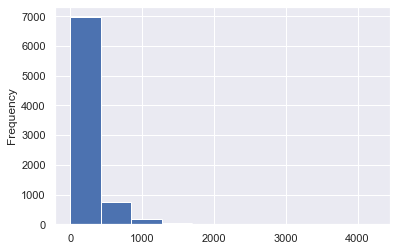

In [150]:
# duration in seconds
df_tripOrders['Speed'].value_counts().plot(kind ='hist')

>- So the above plot shows most of the orders took few seconds to deliver to the requested destination. 

**Weekend analysis**

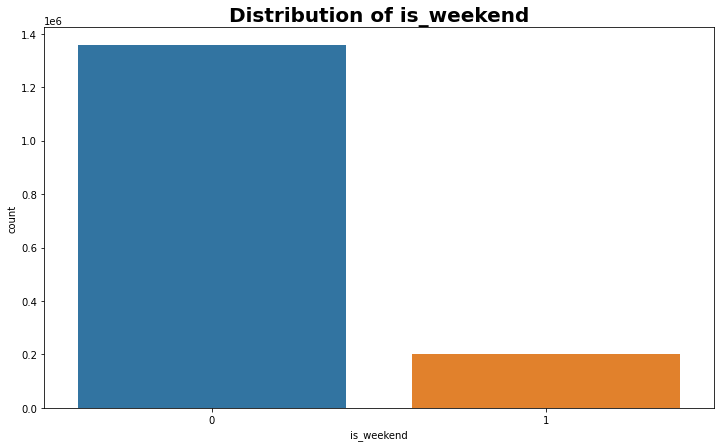

In [14]:
#plt.title(f'is_weekend analysis', size=20, fontweight='bold')
VisualiseDf.plot_count(df_trip, 'is_weekend')

**Distance Analysis**

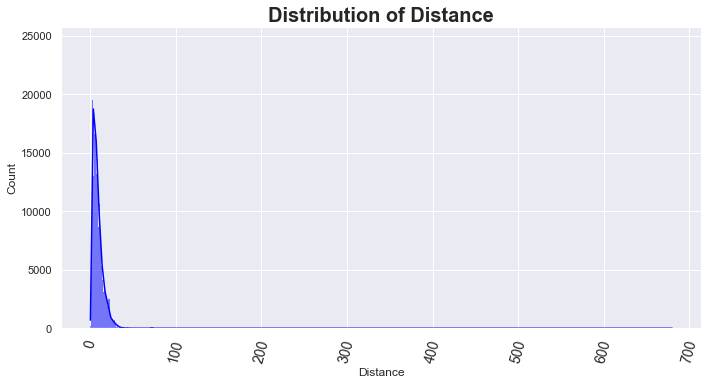

In [153]:
# Distance analysis
VisualiseDf.plot_hist(df_tripOrders,'Distance','blue')

In [157]:
df_tripOrders['Distance'].max()

680.0808474078148

- The above plot about Distance shows that, mostly the trips are short distance (in km) Howevere, there are few outliers like `680 km` distance coverage.

**Hourly accepted request analyis**

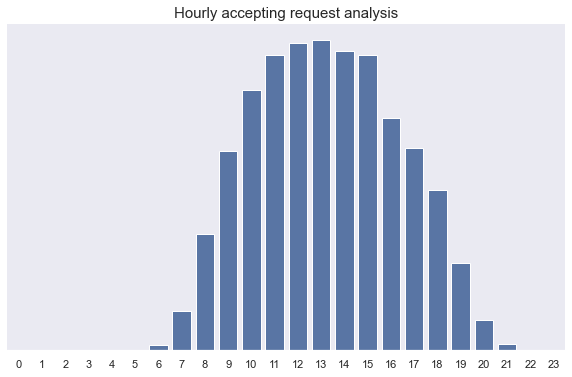

In [79]:
# hourly distibution of accepting request
def houracceptingrequest_bar():
    hour_order = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23]
    base_color = sns.color_palette()[0]
    plt.figure(figsize=(10,6))
    plt.title('Hourly accepting request analysis', fontsize=15)
    ax = sns.countplot(data=df_trorderAccept, x='Hour', order=hour_order, color=base_color)

    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    plt.yticks([])
    plt.ylabel('')
    plt.xlabel('');
houracceptingrequest_bar()

As we can see from the above plot,
>- The most used hour in accepting orders is at 13 and the second most hour is 12. This could be due to it is arround lunch time, so that people may want to order foods and other through the drivers. 

**accepting request analyis per date**

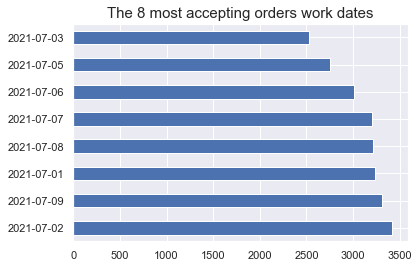

In [167]:
# Here 8 working dates are sampled to answer the question 
plt.title(f'The 8 most accepting orders work dates', fontsize=15)
df_trorderAccept.Date.value_counts(ascending = False).head(8).plot(kind ='barh');

**Observations**
>- 2021-07-02 is the day mostly request are accepted by the drivers.

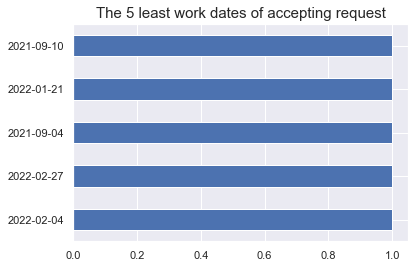

In [82]:
plt.title(f'The 5 least work dates of accepting request', fontsize=15)
df_trorderAccept.Date.value_counts(ascending = True).head(5).plot(kind ='barh');

## Bivariat Exploration 

 #### What does driver_action tells us on each day in the given dataset?
- Seaborn countplot ploting method is used to compute the nuber of user types per day

In [138]:
# first grouping b the Trip iD
df_trip = df_tripOrders.groupby(['Trip ID'])

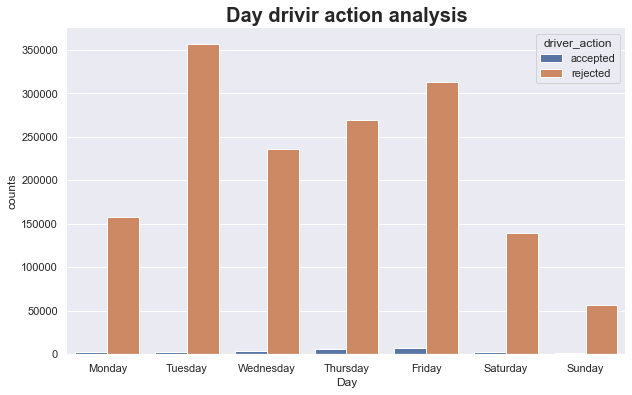

In [139]:
# code using countplot 
def bar_plot(df, column,orders,heu1,title):
        plt.figure(figsize=(10,6))
        plt.title(title, size=20, fontweight='bold')
        chart = sns.countplot(data=df_tripOrders, x=column, order=orders, hue=heu1)

        chart.set(xlabel=column, ylabel='counts')
        sns.despine(fig=None, ax=None, top=True, right=True, left=True, bottom=False, offset=None, trim=False)
        plt.gca().legend().set_title(heu1);

days=["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]
bar_plot(df_trip, 'Day', days, 'driver_action','Day drivir action analysis')

- The plot shows Most of the orders rejected. This could be due to different constraints such as the number of drivers and other factors.

**Distance vs Speed or duration**

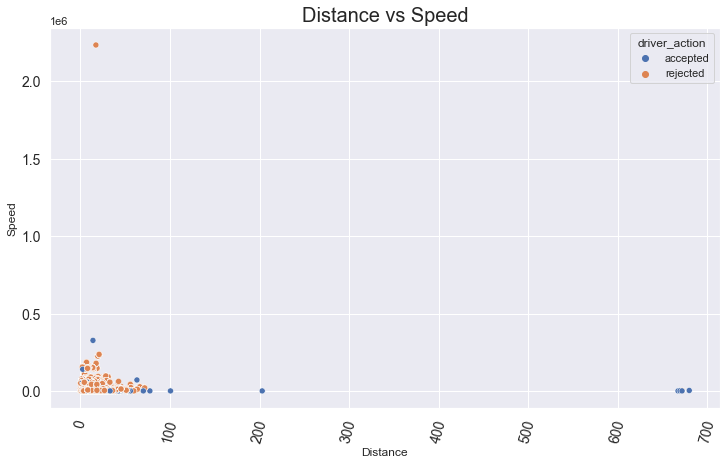

In [163]:
#plot_scatter(df_cleaData, )
VisualiseDf.plot_scatter(df_tripOrders, 'Distance','Speed', 'Distance vs Speed', 'driver_action', None)

**What does look like the numerical and catagorical varibles relationship?**
- Some of the catagorical I mostly intersted are included here. boxplot is applied to show the relationship between them.

<Figure size 1440x720 with 0 Axes>

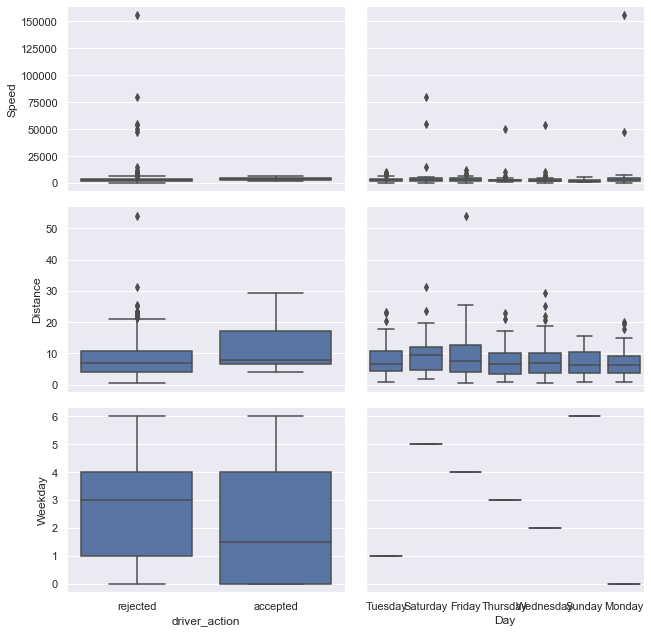

In [165]:
df_cat =df_tripOrders[['driver_action', 'Day']]

df_trOr_sample1 = df_tripOrders.sample(n=300, replace = False)
def boxgrid(x, y, **kwargs):
    """ Quick hack for creating box plots with seaborn's PairGrid. """
    default_color = sns.color_palette()[0]
    sns.boxplot(x=x, y=y, color=default_color)

plt.figure(figsize = [20, 10])
g = sns.PairGrid(data = df_trOr_sample1, y_vars = ['Speed','Distance', 'Weekday'], x_vars = df_cat,
                height = 3, aspect = 1.5)
g.map(boxgrid)
plt.show();

- The above box plot shows some skewness and outliers with regard to each relatioship

## Dropping the unnecessary columns

In [183]:
df_tOrders_clean = df_tripOrders.copy()

In [184]:
df_tOrders_clean.drop(['Unnamed: 0', 'Trip Origin', 'Trip Destination','Trip Start Time', 'Trip End Time','lat', 'lng','id','order_id'], inplace=True, axis=1)

In [185]:
df_tOrders_clean.to_csv('../data/final_data.csv', index = False)